<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/3_Project/2_Skill_Demand.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# What are the most demanded skills for the top 5 most popular data roles?

#### Methodology
1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final findings

## Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter Data for the Singapore and Philippines

In [2]:
df_SGPH = df.query(' (job_country == "Philippines") | (job_country == "Singapore") ').copy()
df_SGPH.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
25,Senior Data Analyst,"Senior Officer, Data Analyst, GTO",Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-06-23 13:56:10,True,False,Singapore,None,NaN,NaN,United Overseas Bank,[sql],{'programming': ['sql']}
44,Data Scientist,Binance Accelerator Program - Data Scientist (...,Singapore,via LinkedIn,Contractor,False,Singapore,2023-04-12 13:53:26,False,False,Singapore,None,NaN,NaN,Binance,"[python, java, scala]","{'programming': ['python', 'java', 'scala']}"
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,None,NaN,NaN,Support Shepherd,"[sql, python, r, excel, tableau, power bi]","{'analyst_tools': ['excel', 'tableau', 'power ..."
82,Data Engineer,Cbi Application Data Design Engineer,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-24 13:17:39,False,False,Singapore,None,NaN,NaN,Siemens,None,None
87,Data Scientist,Data Science Team Lead,Singapore,via LinkedIn,Full-time,False,Singapore,2023-03-23 13:47:01,False,False,Singapore,None,NaN,NaN,GovTech Singapore,"[r, python, tableau, qlik]","{'analyst_tools': ['tableau', 'qlik'], 'progra..."


In [3]:
df_SGPH[df_SGPH[['job_skills']].isnull().all(1)] # list of rows with null job_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
82,Data Engineer,Cbi Application Data Design Engineer,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-24 13:17:39,False,False,Singapore,None,NaN,NaN,Siemens,None,None
934,Business Analyst,Business Analysts,"Makati, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-02-28 13:29:10,False,False,Philippines,None,NaN,NaN,Fujitsu,None,None
1004,Data Scientist,Research Analyst,"Manila, Metro Manila, Philippines",via LinkedIn,None,False,Philippines,2023-06-30 13:20:50,False,False,Philippines,None,NaN,NaN,FactSet,None,None
1298,Data Scientist,Analytics and Modeling Analyst,"Taguig, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-07-10 13:38:41,True,False,Philippines,None,NaN,NaN,myGwork,None,None
1696,Data Engineer,PreSales Engineer (Data Services / Storage,Singapore,via LinkedIn,Full-time,False,Singapore,2023-04-28 13:49:58,False,False,Singapore,None,NaN,NaN,Hewlett Packard Enterprise,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785560,Data Analyst,Data Architect | Cebu,"Cebu City, Cebu, Philippines",via Kalibrr,Full-time,False,Philippines,2023-01-04 15:59:42,False,False,Philippines,None,NaN,NaN,Accenture Philippines,None,None
785582,Data Scientist,Data Researcher,"Quezon City, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-08 06:20:44,True,False,Philippines,None,NaN,NaN,MicroSourcing,None,None
785604,Data Engineer,"Associate Engineer, Operation (Data Centre)",Singapore,via LinkedIn,Full-time,False,Singapore,2023-01-16 06:23:31,False,False,Singapore,None,NaN,NaN,Singtel,None,None
785634,Business Analyst,Flight Analyst,"Quezon City, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-25 06:17:51,True,False,Philippines,None,NaN,NaN,ProbeGroup Philippines Inc.,None,None


In [4]:
 df_SGPH.info() # Index: 35482 entries, 25 to 785736 # 17 columns

<class 'pandas.core.frame.DataFrame'>
Index: 35482 entries, 25 to 785736
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        35482 non-null  object        
 1   job_title              35482 non-null  object        
 2   job_location           35482 non-null  object        
 3   job_via                35482 non-null  object        
 4   job_schedule_type      30871 non-null  object        
 5   job_work_from_home     35482 non-null  bool          
 6   search_location        35482 non-null  object        
 7   job_posted_date        35482 non-null  datetime64[ns]
 8   job_no_degree_mention  35482 non-null  bool          
 9   job_health_insurance   35482 non-null  bool          
 10  job_country            35482 non-null  object        
 11  salary_rate            178 non-null    object        
 12  salary_year_avg        166 non-null    float64       
 13  sala

## Explode job_skills column
Converts the `job_skills` column from string representations of lists into actual list objects and then expands these lists so each skill appears in its own row. It then displays the `job_title` and `job_skills` columns, allowing us to analyze the distribution of skills across different data job titles.

In [5]:
df_SGPH_skills = df_SGPH.explode('job_skills')
df_SGPH_skills[['job_title', 'job_skills']]

,job_title,job_skills
25,"Senior Officer, Data Analyst, GTO",sql
44,Binance Accelerator Program - Data Scientist (...,python
44,Binance Accelerator Program - Data Scientist (...,java
44,Binance Accelerator Program - Data Scientist (...,scala
76,Data Analyst - 14785091749,sql
...,...,...
785736,DevOps Engineer,linux
785736,DevOps Engineer,unix
785736,DevOps Engineer,kubernetes
785736,DevOps Engineer,docker


In [6]:
df_SGPH_skills['job_title_short'].unique()

array(['Senior Data Analyst', 'Data Scientist', 'Data Analyst',
       'Data Engineer', 'Senior Data Scientist',
       'Machine Learning Engineer', 'Business Analyst',
       'Software Engineer', 'Cloud Engineer', 'Senior Data Engineer'],
      dtype=object)

## Count job_skills per Job Title

Groups DataFrame by `job_skills` and `job_title_short`, counting the occurrences of each skill within each job title. Then resets the index of the Series to turn it back into a DataFrame and renames the series holding the count to 'count'. The final DataFrame, `df_skills_count`, shows the frequency of each skill with each job title.

In [7]:
df_SGPH_skills_count = df_SGPH_skills.groupby('job_title_short')['job_skills'].value_counts()
df_SGPH_skills_count = df_SGPH_skills_count.reset_index(name='skill_count')
df_SGPH_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [10]:
df_SGPH_skills_count

,job_title_short,job_skills,skill_count
291,Data Analyst,sql,5441
292,Data Analyst,excel,4544
474,Data Engineer,sql,4543
475,Data Engineer,python,4312
293,Data Analyst,python,4083
...,...,...,...
462,Data Analyst,ionic,1
461,Data Analyst,firestore,1
460,Data Analyst,chef,1
459,Data Analyst,asp.net core,1


## Create List of Top 5 Roles

#### Focus: Data Analyst, Senior Data Analyst, Data Scientist, Business Analyst, Data Engineer

Filter the job titles based on the most popular.

In [11]:
df_SGPH_skills_count['job_title_short'].unique().tolist()[:5]
SGPH_top_jobs = df_SGPH_skills_count['job_title_short'].unique().tolist()[:5]
SGPH_top_jobs

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Business Analyst',
 'Senior Data Analyst']

## Plot Skill Counts

Creates a stacked horizontal bar chart for the top 5 skills for Top 5 roles, displaying the frequency of each skill. 

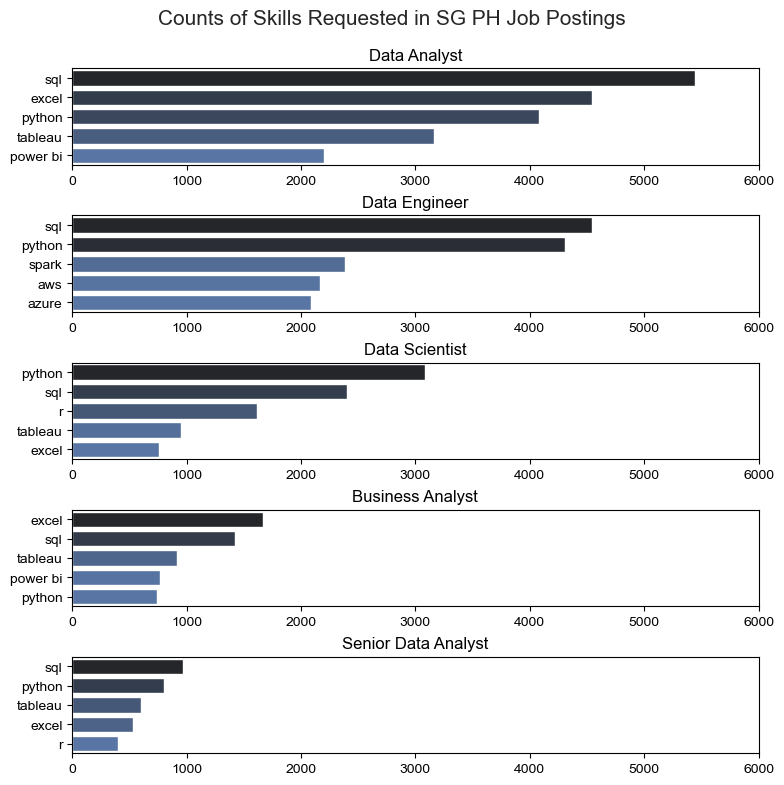

In [12]:
fig, ax = plt.subplots(len(SGPH_top_jobs), 1, figsize=(8,8))

sns.set_theme(style='ticks')

for i, job_title in enumerate(SGPH_top_jobs):
    df_plot = df_SGPH_skills_count[df_SGPH_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 6000) # make the scales the same

fig.suptitle('Counts of Skills Requested in SG PH Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
# f.set_figheight(15)
# f.set_figwidth(15)

plt.show()

## Display the Counts as Percentages

This will help understand what is the percentage of requested job skills relative to the total job skills requisition of the entire dataset.
Calculate the total counts for the jobs posted by job title. Calculate the number of each job title using the `value_counts()` method on the `job_title_short` column. Then reset the index to transform the Series into a DataFrame and renames the columns to `job_title_short` and `jobs_total`.

In [13]:
# Use original df to get the count of job titles
SGPH_total_jobs = df_SGPH['job_title_short'].value_counts().reset_index(name='jobs_total')
SGPH_total_jobs

,job_title_short,jobs_total
0,Data Analyst,11398
1,Data Engineer,7839
2,Data Scientist,5057
3,Business Analyst,3681
4,Software Engineer,2104
5,Senior Data Analyst,1676
6,Senior Data Engineer,1272
7,Senior Data Scientist,990
8,Machine Learning Engineer,866
9,Cloud Engineer,599


In [ ]:
SGPH_skills_perc = pd.merge(df_SGPH_skills_count, SGPH_total_jobs, on='job_title_short', how='left')
SGPH_skills_perc['skill_percent'] = (SGPH_skills_perc['skill_count'] / SGPH_skills_perc['jobs_total']) * 100

In [86]:
SGPH_skills_perc[SGPH_skills_perc['job_title_short'].isin(['Data Analyst','Data Engineer','Data Scientist','Business Analyst','Senior Data Analyst'])] \
    .sort_values(by='skill_percent', ascending=False).head(20)


,job_title_short,job_skills,skill_count,jobs_total,skill_percent
6,Data Scientist,python,3083,5057,60.964999
2,Data Engineer,sql,4543,7839,57.953821
21,Senior Data Analyst,sql,967,1676,57.696897
3,Data Engineer,python,4312,7839,55.007016
0,Data Analyst,sql,5441,11398,47.736445
32,Senior Data Analyst,python,800,1676,47.732697
7,Data Scientist,sql,2400,5057,47.458968
15,Business Analyst,excel,1671,3681,45.395273
1,Data Analyst,excel,4544,11398,39.866643
17,Business Analyst,sql,1419,3681,38.549307
